__Note:__ Comments and additional useful info have been added to the original notebook __mnist-mlp/mnist_mlp.ipynb__ from `https://github.com/udacity/aind2-cnn.git`

# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

__MNIST database of handwritten digits__ consists of  

* Train dataset of 60,000 28x28 grayscale images of the 10 digits _0 to 9_
* Test dataset of 10,000 28x28 grayscale images  


__Usage:__

```
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

The function returns 2 tuples:  

* x_train, x_test: unit8 array of grayscale image data with shape (num_samples, 28, 28)
* y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples)

_Reference:_ https://keras.io/datasets/

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

/home/supannee/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### 2. Visualize the First Six Training Images

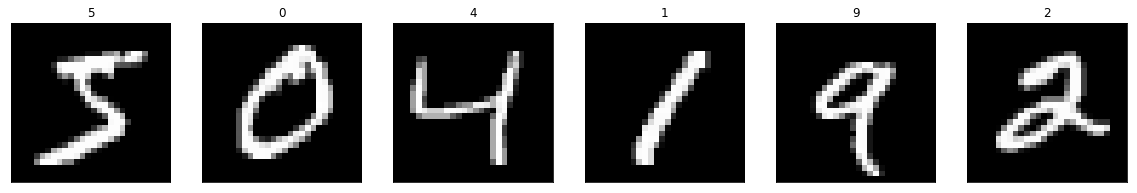

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20)) # Create a figure object of size 20x20 inches
for i in range(6):
    # subplot: 1 row x 6 cols
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[]) # the subplot takes position (i+1)th
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

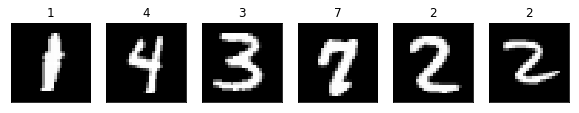

In [3]:
# Display image as random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random # to random number

# plot six random training images
fig = plt.figure(figsize=(10,10)) # Create a figure object of size 10x10 inches
for i in range(6):
    # subplot: 1 row x 6 cols
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[]) # the subplot takes position (i+1)th
    # display a random sample
    n = random.randint(0, len(X_train))
    ax.imshow(X_train[n], cmap='gray')
    ax.set_title(str(y_train[n]))

### 3. View an Image in More Detail

width: 28, height: 28
thresh = 255/2.5 = 102.0


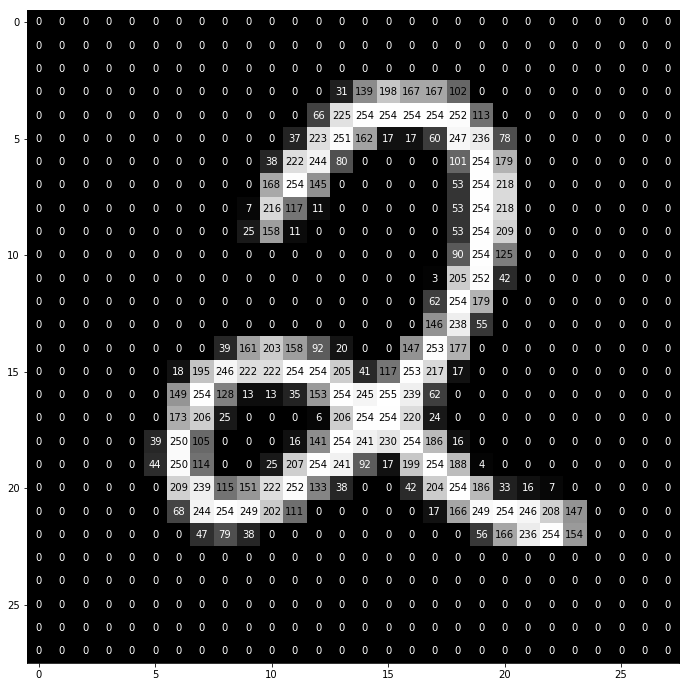

In [4]:
def visualize_input(img, ax): # pass subplot object
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    print('width: {}, height: {}'.format(width, height))    
    print('thresh = {}/2.5 = {}'.format(img.max(), thresh))
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), # text = round img[x][y] to 2 digits after .
                        xy=(y,x), # coordinate as a tuple (row, col)
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black') # text color
                        #color='green' if img[x][y]<40.0 else 'red')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111) # gride of 1 row x 1 col and display at 1th
#visualize_input(X_train[0], ax)
#visualise a random image
n = random.randint(0, len(X_train))
visualize_input(X_train[n], ax)
#ax.set_title(str(y_train[n]))

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

__Usage:__  

```
keras.utils.to_categorial(y, num_classes = None)
```
Converts a class vector (integers) to binary class matrix
> __y:__ class vector to be converted (must be integers from 0 to num_classes)  
> __num_class:__ total number of classes  

__Example:__ a one-hot encoder for 1, 3, 9 with 10 classes is
```
0123456789 # position
0100000000 # one-hot for 1
0001000000 # one-hot for 3
0000000001 # one-hot for 9

```

_Reference:_ https://keras.io/utils/

In [6]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture


We first start by creating a `Sequential` model. 
```
# define the model
model = Sequential()
```
We can then add layers via the `.add()` method or passing a list of layer intances to the constructor above.  
Since the model needs to know what input shape to be expected, we need to pass the shape of the input in the first layer.  

The input shape is defined by `input_shape=X_train.shape[1:]` in which `X_train.shape[1:]` is `(28, 28)`.

`print(X_train.shape[1:]) # (28,28)`

The first thing we have to do is to convert the input matrix into a row vector using `Flatten`.

```
model.add(Flatten(input_shape=X_train.shape[1:]))
```

`Flatten()` converts the input matrix X into a row vector as illustrated in the figure below: 

!["Illustration of Flatten"](Figure_1_Illustration_of_Flatten.png)


For the input shape (28,28) it is convert to a row vector of size (1,784) from $28x28 = 784$.

Then add the remaining layers in the sequence.
```
# Add a fully connected layer with 512 hidden units
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# Add a fully connected layers with 10 hidden units ~ number of classes
model.add(Dense(10, activation='softmax'))
```

_Reference:_ https://keras.io/getting-started/sequential-model-guide/

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
# Flatten X from a matrix into a row vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model  

We use `compile()` to configure the model for training.  

__Usage:__  

`compile(self, optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)`  

Details for optimiser can be found on this link: https://keras.io/optimizers/

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [9]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 13.4100%


### 9. Train the Model

In [10]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.2757 - acc: 0.9137 - val_loss: 0.1349 - val_acc: 0.9575

Epoch 00001: val_loss improved from inf to 0.13493, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.1125 - acc: 0.9654 - val_loss: 0.0915 - val_acc: 0.9725

Epoch 00002: val_loss improved from 0.13493 to 0.09148, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.0795 - acc: 0.9748 - val_loss: 0.0834 - val_acc: 0.9765

Epoch 00003: val_loss improved from 0.09148 to 0.08339, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.0624 - acc: 0.9807 - val_loss: 0.0873 - val_acc: 0.9760

Epoch 00004: val_loss did not improve
Epoch 5/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.0

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.8400%
